In [16]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA # Implementación del Análisis de Componentes Principales (PCA).
from sklearn.preprocessing import StandardScaler # Estandarización de datos para análisis estadísticos.

In [17]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data)
variables =  iris_df.columns

In [18]:
iris_corr = iris_df.corr()

<Axes: >

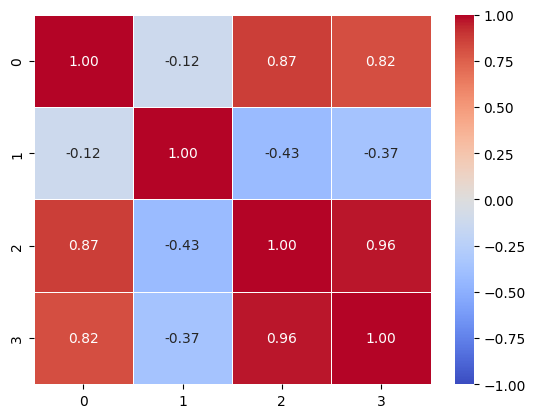

In [19]:
sns.heatmap(iris_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

In [21]:
iris_std = pd.DataFrame(
    StandardScaler().fit_transform(iris_df),  # Datos estandarizados
    columns=['{}_z'.format(variable) for variable in variables],  # Nombres de columnas estandarizadas
    index=iris_df.index  # Índices (etiquetas de filas) del DataFrame
)
iris_std.head()

,0_z,1_z,2_z,3_z
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [22]:
pca = PCA(n_components=2)
fit = pca.fit(iris_std)

# Obtener los autovalores asociados a cada componente principal.
autovalores = fit.explained_variance_
autovalores

# Obtener la varianza explicada por cada componente principal como un porcentaje de la varianza total.
var_explicada = fit.explained_variance_ratio_
# Por ejemplo podemos ver que la varianza explicada por tres CP es:
var_explicada_2 = np.sum(var_explicada[:2])
var_explicada_2

# Calcular la varianza explicada acumulada a medida que se agregan cada componente principal.
var_acumulada = np.cumsum(var_explicada)
var_acumulada

# Crear un DataFrame de pandas con los datos anteriores y establecer índice.
data = {'Autovalores': autovalores, 'Variabilidad Explicada': var_explicada, 'Variabilidad Acumulada': var_acumulada}
tabla = pd.DataFrame(data, index=['Componente {}'.format(i) for i in range(1, fit.n_components_+1)])

# Imprimir la tabla
print(tabla)

              Autovalores  Variabilidad Explicada  Variabilidad Acumulada
Componente 1     2.938085                0.729624                0.729624
Componente 2     0.920165                0.228508                0.958132


In [ ]:
plot_varianza_explicada(var_explicada, fit.n_components_)